<a href="https://colab.research.google.com/github/muhnasih/MESIN-LEARNING/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Nasih
Kelas : TI 3H
NIM : 2341720009

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [16]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [17]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [18]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [19]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
# Data Size
df.shape

(48842, 15)

In [21]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       47879 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      47876 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             0 non-null      float64
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  48842 non-null  int64  
 13  native-country  48568 non-null  object 
 14  income          32561 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 5.6+ MB


In [49]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,48842


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [25]:
df.isnull().sum()


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [26]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Fitur kualitatif:", list(categorical_features))

print("\n=== Nilai unik sebelum cleaning ===")
for col in categorical_features:
    print(f"\nKolom: {col}")
    print(df[col].unique())

for col in categorical_features:
    df[col] = df[col].str.strip()

df['native-country'] = df['native-country'].replace({'United States': 'United-States'})

country_counts = df['native-country'].value_counts()
rare_countries = country_counts[country_counts < 50].index
df['native-country'] = df['native-country'].replace(rare_countries, 'Others')

print("\n=== Nilai unik sesudah cleaning ===")
for col in categorical_features:
    print(f"\nKolom: {col}")
    print(df[col].unique())


Fitur kualitatif: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

=== Nilai unik sebelum cleaning ===

Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

Kolom: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

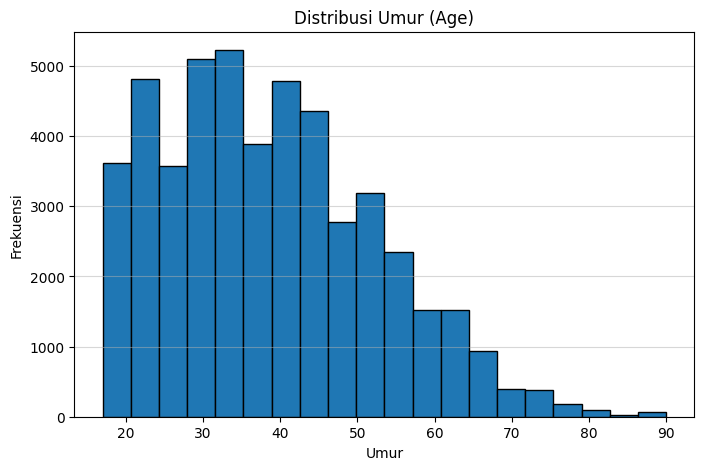

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.5)
plt.show()


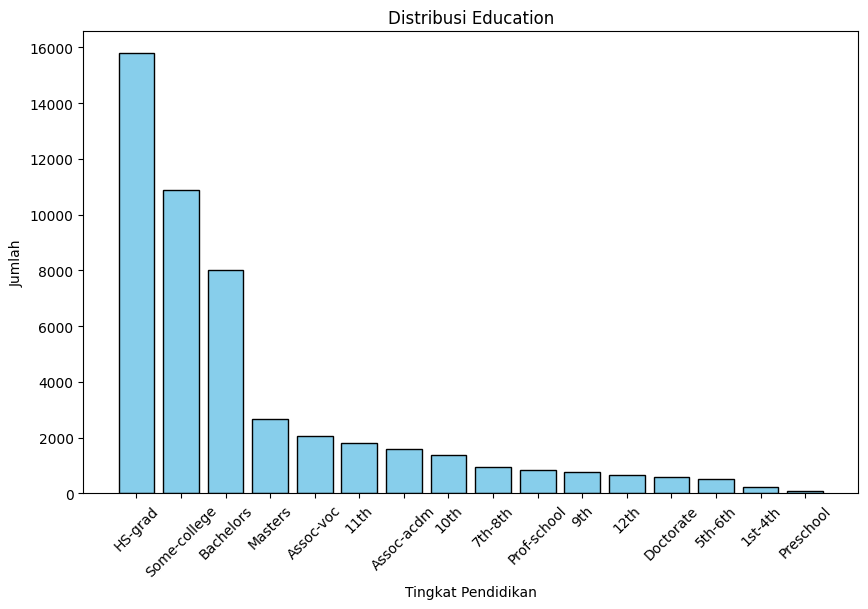

In [28]:
import matplotlib.pyplot as plt

edu_counts = df['education'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(edu_counts.index, edu_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribusi Education')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

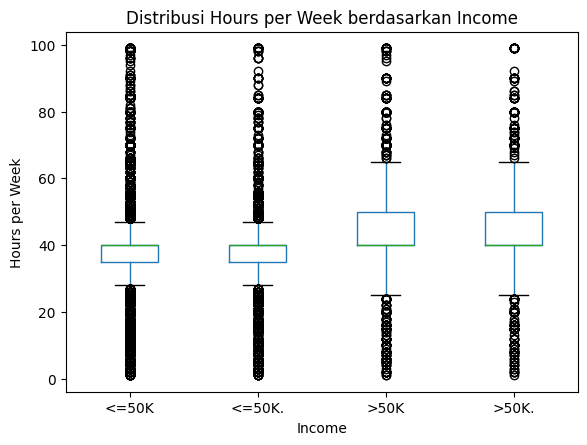

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(column='hours-per-week', by='income', grid=False)

plt.title('Distribusi Hours per Week berdasarkan Income')
plt.suptitle('')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


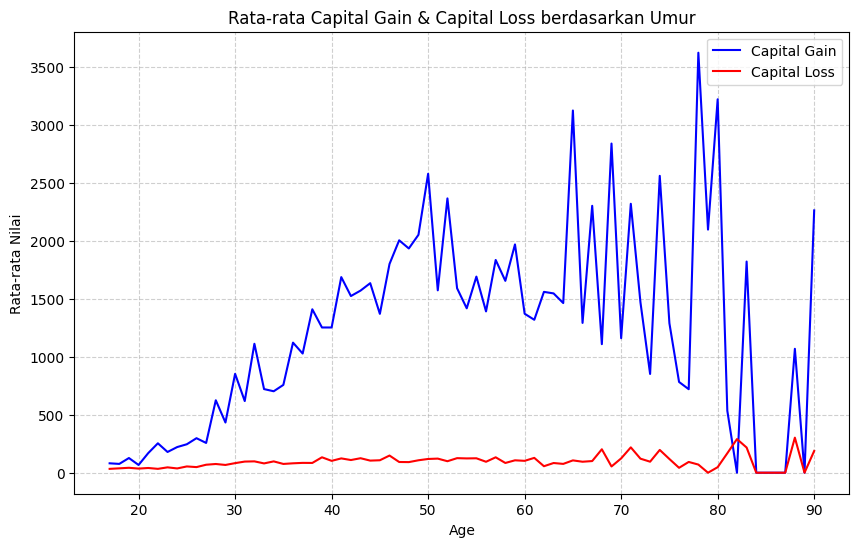

In [30]:
import matplotlib.pyplot as plt

age_capital = df.groupby('age')[['capital-gain', 'capital-loss']].mean()


plt.figure(figsize=(10,6))
plt.plot(age_capital.index, age_capital['capital-gain'], label='Capital Gain', color='blue')
plt.plot(age_capital.index, age_capital['capital-loss'], label='Capital Loss', color='red')

plt.title('Rata-rata Capital Gain & Capital Loss berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Rata-rata Nilai')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [36]:
# Jawab dengan komentar python
# 1. Artinya, sebagian besar data berpusat pada usia produktif (20–50 tahun),
#    sedangkan semakin sedikit orang pada usia lanjut.
#    Tidak terlihat adanya missing value pada kolom 'age'.

# 2. - Strategi imputasi yang paling tepat adalah menggunakan nilai median.
#    - Alasannya karena data 'age' bersifat numerik kontinu dan skewed,
#    - sehingga median lebih representatif dibanding mean (tidak dipengaruhi outlier).

# 3. - Pada kategori '<=50K' terdapat lebih banyak outlier,
#      terutama individu yang bekerja lebih dari 60 jam per minggu.
#    - Pada kategori '>50K' juga ada outlier, tetapi jumlahnya lebih sedikit.
#    - Kesimpulan: kategori '<=50K' adalah yang paling banyak memiliki outlier.

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [39]:
import pandas as pd

df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(df[['sex', 'income']].head())


   sex  income
0  NaN     0.0
1  NaN     0.0
2  NaN     0.0
3  NaN     0.0
4  NaN     0.0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.234037       0.335154        0.229689      0.223329   

                capital-loss    income  
age                 0.056944  0.234037  
education-num       0.080972  0.335154  
hours-per-week      0.054467  0.229689  
capital-gain       -0.031441  0.223329  
capital-loss        1.000000  0.150526  
income              0.150526  1.000000  


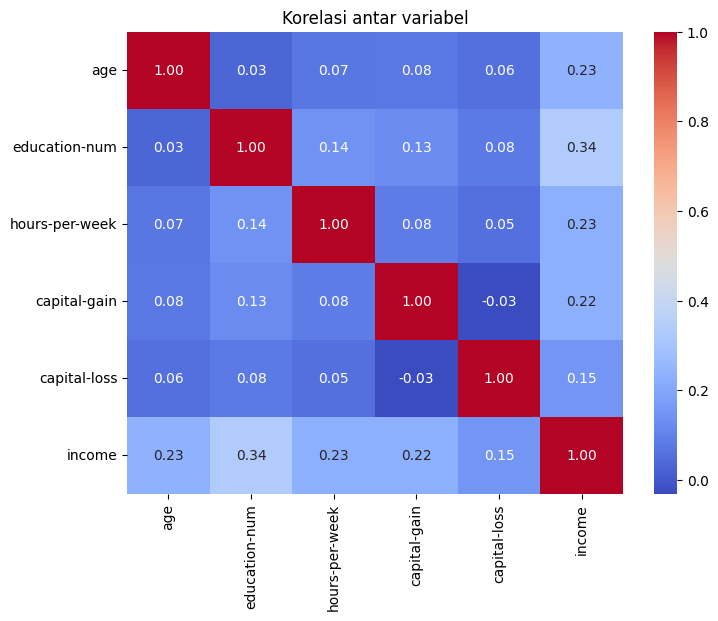

In [40]:
corr = df[['age', 'education-num', 'hours-per-week',
           'capital-gain', 'capital-loss', 'income']].corr()

print(corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()


In [ ]:
# Hasil analisis jelaskan pada cell ini
# Variabel yang paling berpengaruh terhadap income adalah:
# - education-num (tingkat pendidikan),
# - capital-gain (pendapatan investasi),
# - age (usia).
# Sementara hours-per-week dan capital-loss punya pengaruh lebih kecil terhadap income.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [41]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


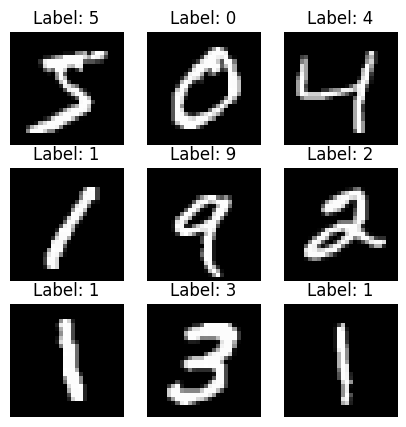

In [42]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

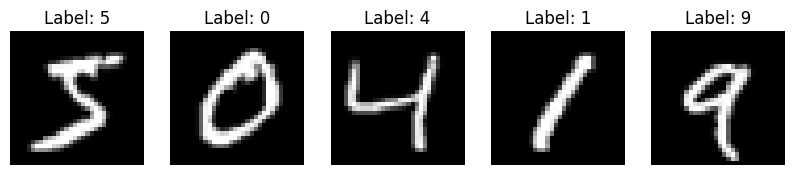

In [43]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_up = []
for img in X_train[:5]:
    resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    X_train_up.append(resized)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

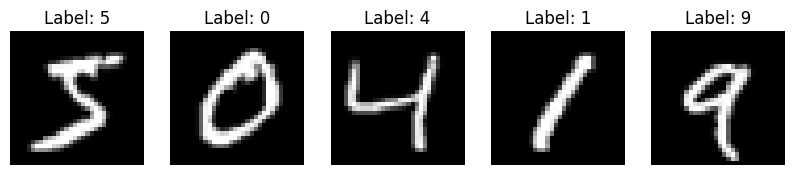

Min pixel: 0.0
Max pixel: 1.0


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_up = []
for img in X_train[:5]:
    resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    resized = resized.astype("float32") / 255.0
    X_train_up.append(resized)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()
print("Min pixel:", np.min(X_train_up[0]))
print("Max pixel:", np.max(X_train_up[0]))


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [46]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

(_, _), (X_test, y_test) = mnist.load_data()

X_test_processed = np.zeros((X_test.shape[0], 32*32), dtype=np.float32)
for i in range(X_test.shape[0]):
    resized = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)
    normalized = resized.astype("float32") / 255.0
    flattened = normalized.flatten()
    X_test_processed[i] = flattened

print("Shape data test setelah diproses:", X_test_processed.shape)
print("Contoh data pertama (10 elemen awal):", X_test_processed[0][:10])


Shape data test setelah diproses: (10000, 1024)
Contoh data pertama (10 elemen awal): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
